# Bikesharing Investigation
## by Marc Nguyen

## Preliminary Wrangling

> In this investigation, I will be exploring Ford's GoBike bike sharing program in San Francisco, California.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Extract:
Data will be downloaded from: https://s3.amazonaws.com/fordgobike-data/index.html <br>
The database of the Ford GoBike bike sharing program 
<hr>

In [2]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv('201801-fordgobike-tripdata.csv')
df2 = pd.read_csv('201802-fordgobike-tripdata.csv')
df3 = pd.read_csv('201803-fordgobike-tripdata.csv')
df4 = pd.read_csv('201804-fordgobike-tripdata.csv')
df5 = pd.read_csv('201805-fordgobike-tripdata.csv')
df6 = pd.read_csv('201806-fordgobike-tripdata.csv')
df7 = pd.read_csv('201807-fordgobike-tripdata.csv')
df8 = pd.read_csv('201808-fordgobike-tripdata.csv')
df9 = pd.read_csv('201809-fordgobike-tripdata.csv')
df10 = pd.read_csv('201810-fordgobike-tripdata.csv')
df11 = pd.read_csv('201811-fordgobike-tripdata.csv')
df12 = pd.read_csv('201812-fordgobike-tripdata.csv')

In [3]:
# the data base was divided per month.  combined the 12 months into one dataset for 2018
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

### What is the structure of your dataset?

> The database that was available had data for half of 2017, all of 2018, and just the first month for this year 2019.  The dataset for 2018 was broken up into individual months.  I decided to go with 2018 data only so that I could trend the data throughout a whole year.  I downloaded the individual files and concat the dataframe together to form one dataset to analyze.

### What is/are the main feature(s) of interest in your dataset?

> The dataset contains information on the bike rental like start time, end time, and location.  It also contains information on the customer, like age, user type, and gender.  We could use these information to display information on the type of uses the rental are used for and what demographics are renting the bikes?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The timestamp will be the key to investing the how the bikes are being used.  We could use the timestamp and break it down to hours, days, weeks, and months and plot them to get an ideal how the uses varies through the time band.

<br><br>

## Clean:
Here I will be cleaning the data in prepartion for exploration
<hr><hr>

In [4]:
# visual veiw of dataset
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


In [7]:
# look for duplicates
df.duplicated().sum()

0

In [8]:
df.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [9]:
# convert start time and end time to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [10]:
# convert start time column into 3 columns of month weekofyear and weekday
df['month'] = df.start_time.dt.month
df['weekofyear'] = df.start_time.dt.weekofyear
df['weekday'] = df.start_time.dt.weekday_name
df['hour'] = df.start_time.dt.hour

In [11]:
# convert user_type and member_gender into category format
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [12]:
df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

In [13]:
# convert duration time to minutes
df['duration_min'] = df['duration_sec'] / 60
df.duration_min = df.duration_min.astype(int)

In [60]:
# save dataset
df.to_csv('df_clean.csv', index=False)

## Exloration:
<hr>

In [14]:
# determine number of unique start and end station
df.start_station_id.nunique(), df.end_station_id.nunique()

(331, 331)

In [15]:
# determine date range
df.start_time.min(), df.start_time.max()

(Timestamp('2018-01-01 00:01:53.847000'),
 Timestamp('2018-12-31 23:59:12.097000'))

In [16]:
# determine how many station id is null
df.start_station_id.isnull().sum()

11771

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Question: Who is using the bike sharing services?

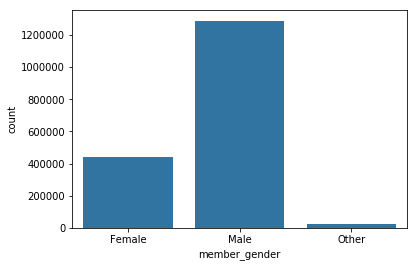

In [17]:
# distribution of users per gender
# an univariate bar chart is used here because we only want to see how usage changes with gender
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color=base_color);

*** Note: There are more than double of male users than female

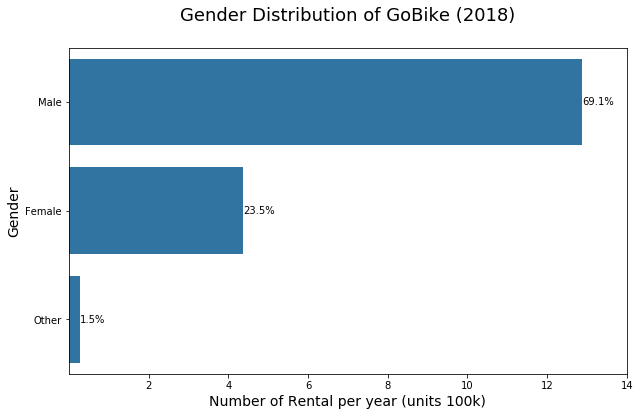

In [18]:
# POLISHING
n_gender = df.shape[0]
gender_count = df.member_gender.value_counts()
gender_count[0], gender_count[1] = gender_count[1], gender_count[0]

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='member_gender', color=base_color, order=df.member_gender.value_counts().index);
plt.title('Gender Distribution of GoBike (2018)\n', fontsize=18);
plt.xlabel('Number of Rental per year (units 100k)', fontsize=14)
plt.ylabel('Gender', fontsize=14);
ticks = [2, 4, 6, 8, 10, 12, 14]
ticks_units = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
plt.xticks(ticks_units, ticks);

for i in range(gender_count.shape[0]):
    count = gender_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)
    plt.text(count+1, i, pct_string, va='center');

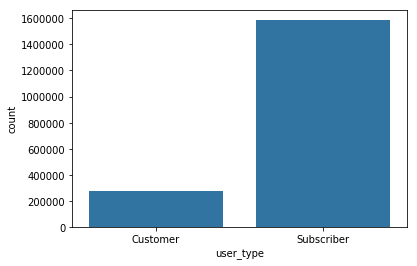

In [19]:
# distribution of user type
# an univariate bar chart is used here because we only want to see how usage changes with user type
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color);

*** Note: Majority of users are on a subscription base

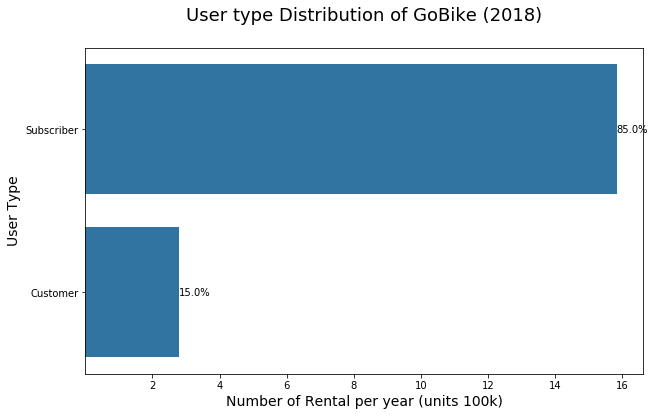

In [20]:
# POLISHING
n_user = df.shape[0]
user_count = df.user_type.value_counts()
user_count[0], user_count[1] = user_count[1], user_count[0]

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='user_type', color=base_color, order=df.user_type.value_counts().index);
plt.title('User type Distribution of GoBike (2018)\n', fontsize=18);
plt.xlabel('Number of Rental per year (units 100k)',fontsize=14)
plt.ylabel('User Type',fontsize=14);
ticks = [2, 4, 6, 8, 10, 12, 14, 16]
ticks_units = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000]
plt.xticks(ticks_units, ticks);

for i in range(user_count.shape[0]):
    count = user_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_user)
    plt.text(count+1, i, pct_string, va='center');

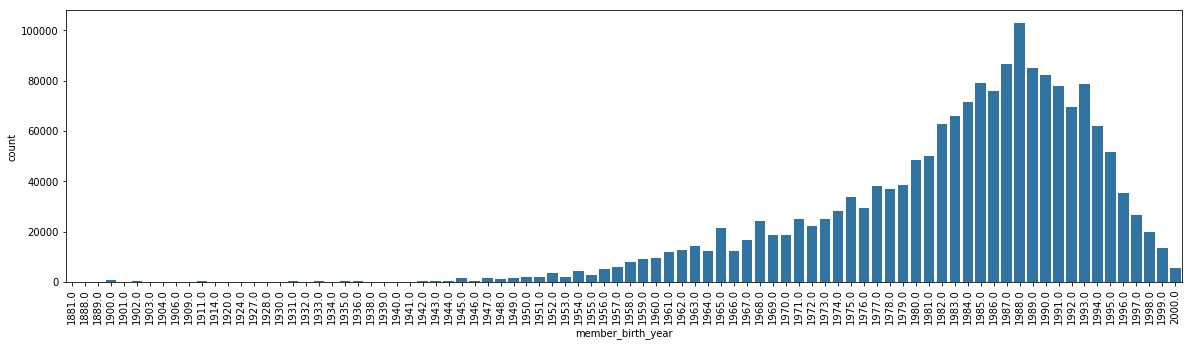

In [21]:
# plot of birthyear
# an univariate bar chart is used here because we only want to see how usage changes with different ages
plt.figure(figsize=[20,5])
sb.countplot(data=df, x='member_birth_year', color=base_color);
plt.xticks(rotation=90);

*** Note: Majority of users are in the late 20's and early 30's.  Plan to break down the birth year to age groups.

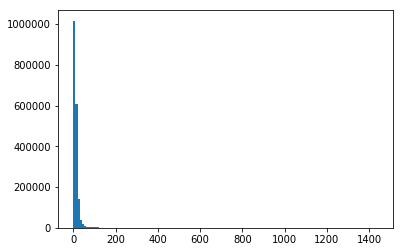

In [22]:
# distribution of duration time in minutes
# an univariate is used here because we only want to see a histagram of duration time
binsize = 10
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.hist(data=df, x='duration_min', bins=bins);

*** Note: there are too many outlires that is hard to visualize the data.  we will be focusing on 1 hour and less

### Question: How long do people rent the bikes?

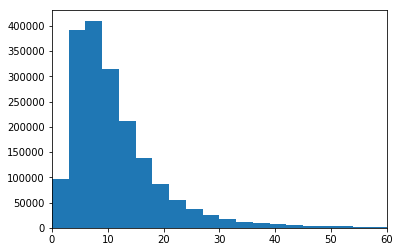

In [23]:
# reduced the outliers and focus on less than 1 hour
# an univariate is used here because we only want to see a histagram of duration time
binsize = 3
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.hist(data=df, x='duration_min', bins=bins);
plt.xlim(0, 60);

*** Note: Majority of rides are less than 20 minutes and the chart is right skewed

### Question: When do people use the bike sharing service?

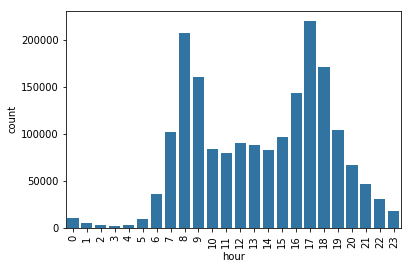

In [24]:
# distribution of users per hour of the day
# an univariate is used here because we only want to see how rides share changes throughout the day
sb.countplot(data=df, x='hour', color=base_color);
plt.xticks(rotation=90);

*** Note: The most popular hours looks to correlate around work hours with majority of people working from 8am to 5pm.  The bike rental gets busy during commute hours.  Looks like people are using the bike to get to work.<br>
Plan: I will this graph for presentation after cleaning it up

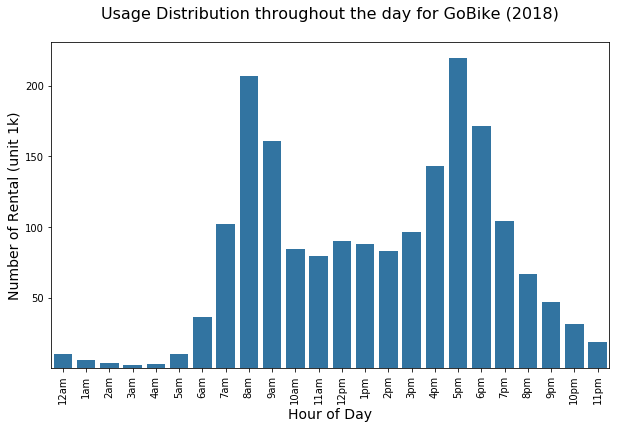

In [25]:
# POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='hour', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the day for GoBike (2018)\n', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Rental (unit 1k)', fontsize=14)
ticks = np.arange(0,24,1)
ticks_units = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xticks(ticks, ticks_units);
yticks = [50, 100, 150, 200]
yticks_units = [50000, 100000, 150000, 200000]
plt.yticks(yticks_units, yticks);

In [26]:
# lets look at weekday only and see if there is a difference
dfweekday = df.query('weekday != "Saturday" or weekday != "Sunday"')

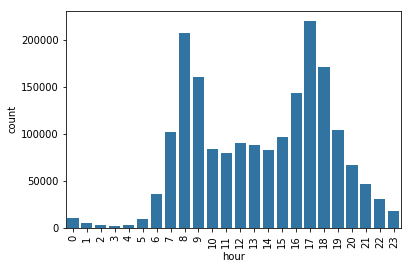

In [27]:
# distribution of users per hour of the day for weekdays
# an univariate is used here because we only want to see how rides share changes throughout the day
sb.countplot(data=dfweekday, x='hour', color=base_color);
plt.xticks(rotation=90);

*** Note: The hours of uses looks the same throughout the week compared to just the weekday

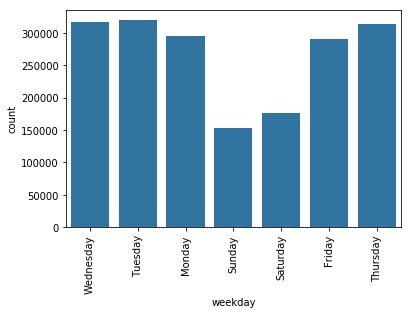

In [28]:
# look at usage per day of the week
sb.countplot(data=df, x='weekday', color=base_color);
plt.xticks(rotation=90);

In [29]:
# create order categorical format for day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_category = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df.weekday = df.weekday.astype(days_category)

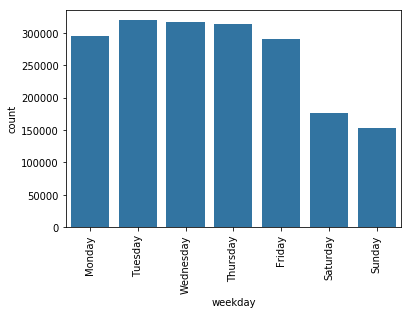

In [30]:
# count plot of uses per day of the week
# an univariate bar chart is used here because we only want to see how usage changes throughout the week
sb.countplot(data=df, x='weekday', color=base_color);
plt.xticks(rotation=90);

*** Note: Majority of uses are during regular work days of Monday to Friday.  Plan to use this to prove that the bikes are used for work

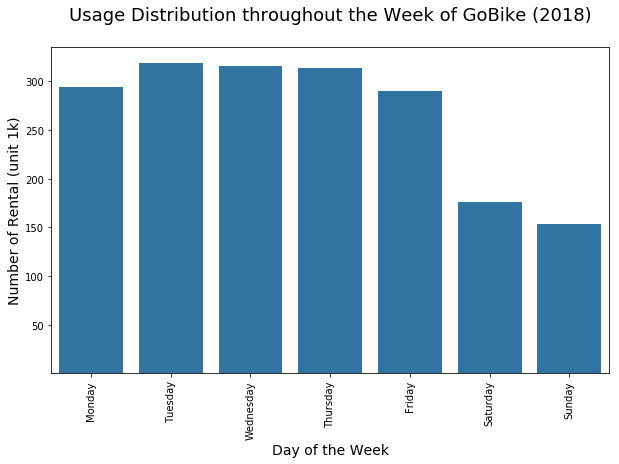

In [48]:
#POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='weekday', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the Week of GoBike (2018)\n', fontsize=18)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rental (unit 1k)', fontsize=14);
yticks = [50, 100, 150, 200, 250, 300]
yticks_units = [50000, 100000, 150000, 200000, 250000, 300000]
plt.yticks(yticks_units, yticks);

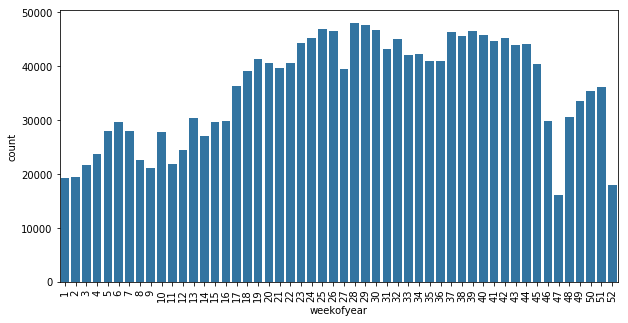

In [32]:
# distribution per week of the year
# an univariate bar chart is used here because we only want to see how usage changes throughout the year
plt.figure(figsize=[10,5])
sb.countplot(data=df, x='weekofyear', color=base_color);
plt.xticks(rotation=90);

*** Note: The same trend as we can in the month distribution, except we could see a rise in rental during Christmas shopping time

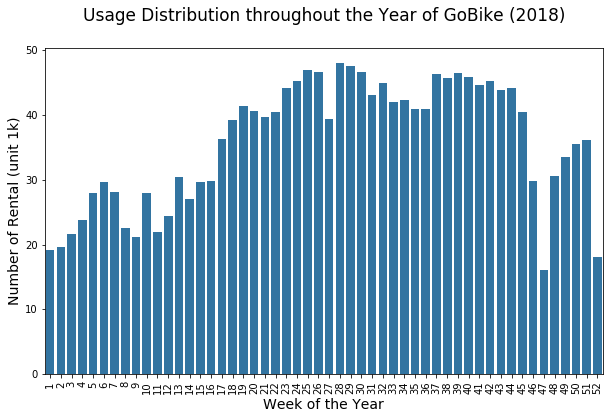

In [49]:
# POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='weekofyear', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the Year of GoBike (2018)\n', fontsize=17)
plt.xlabel('Week of the Year', fontsize=14)
plt.ylabel('Number of Rental (unit 1k)', fontsize=14)

yticks = np.arange(0, 51, 10)
yticks_units = yticks*1000
plt.yticks(yticks_units, yticks);

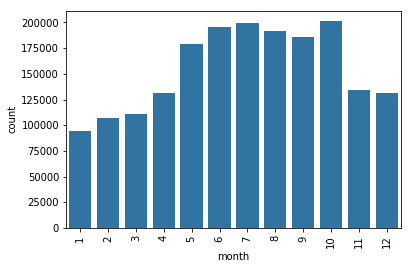

In [34]:
# countplot of number of uses per month
# an univariate bar chart is used here because we only want to see how usage changes throughout the year
sb.countplot(data=df, x='month', color=base_color);
plt.xticks(rotation=90);

*** Note: Bike rental are more popular in months that are warmer and dry in San Francisco

In [35]:
# filter out all nan for birth year to analyze age distribution
df_gen = df.dropna()

### Note:
According to the Pew Research Group, they group people in the following categories:

    The Silent Generation: Born 1928-1945 (73-90 years old)
    Baby Boomers: Born 1946-1964 (54-72 years old)
    Generation X: Born 1965-1980 (38-53 years old)
    Millennials: Born 1981-1996 (22-37 years old)
    Post-Millennials: Born 1997-Present (0-21 years old)

In [36]:
# define function to categorize birth year into age groups as defined by Pew Research group
def gen(row):
    if row['member_birth_year'] <= 1945:
        return 'Silent Generation'
    elif row['member_birth_year'] <= 1964:
        return 'Baby Boomers'
    elif row['member_birth_year'] <= 1980:
        return 'Generation X'
    elif row['member_birth_year'] <= 1996:
        return 'Millennials'
    else:
        return 'Post Millennials'

In [37]:
df_gen['age_group'] = df_gen.apply(gen, axis=1)

C:\Users\J37451\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Question: What age group uses the bike sharing service?

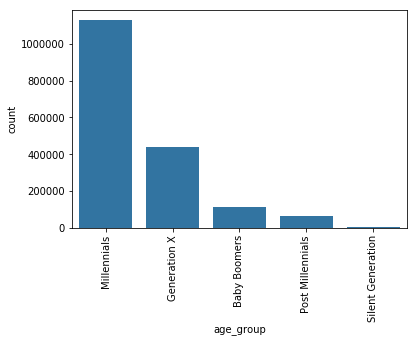

In [38]:
sb.countplot(data=df_gen, x='age_group', color=base_color);
plt.xticks(rotation=90);

*** Note: There is clearly seen that the Millennial age group are the ones using the service more than anybody else.  The Generation X is less than half of the Millennials.

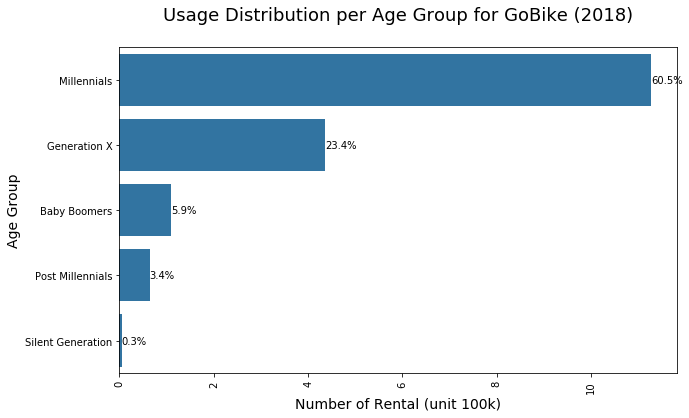

In [50]:
# POLISHING

plt.figure(figsize=(10,6))
sb.countplot(data=df_gen, y='age_group', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution per Age Group for GoBike (2018)\n', fontsize=18)
plt.ylabel('Age Group', fontsize=14)
plt.xlabel('Number of Rental (unit 100k)', fontsize=14)

xticks = np.arange(0, 11, 2)
xticks_units = xticks*100000
plt.xticks(xticks_units, xticks);

n_user = df.shape[0]
user_count = df_gen.age_group.value_counts()

for i in range(user_count.shape[0]):
    count = user_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_user)
    plt.text(count+1, i, pct_string, va='center');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the distribution of the duration bike rental times, the data was clustered around 10 minutes mark, but there are also many outliers that goes out to 24 hours of use.  To get a good understanding of the data, I had to reduce my search to less than 60 minutes to see the distribution clearly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I used the birthdate to find out what age group are using the rental service.  In order to judge by age group instead of individual years, I had to categorize the birthdate to specific generation group like Baby Boomer and Millennials.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

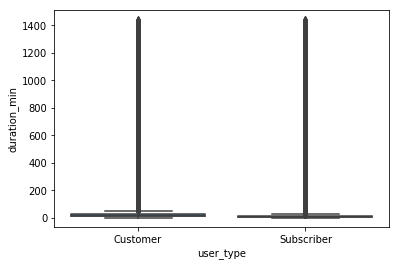

In [40]:
# boxplot of duration time per user type
sb.boxplot(data=df, x='user_type', y='duration_min');

In [41]:
# query only 30  mins or less
df30 = df.query('duration_min <= 30')

### Question: Is there any correlation between User type and duration?

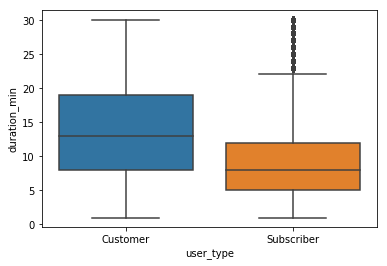

In [42]:
# new boxplot of duration compared to user type
# bivariate boxplot is used to compare categorical data with quantative data and is used to see how usage changes with user type
sb.boxplot(data=df30, x='user_type', y='duration_min');

*** Note: Looks like subscriber rents the bike for shorter trips than the customer

In [43]:
# create order categorical format for day of the week
df30.weekday = df30.weekday.astype(days_category)

C:\Users\J37451\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Question: Is there any correlation between day of the week and duration?

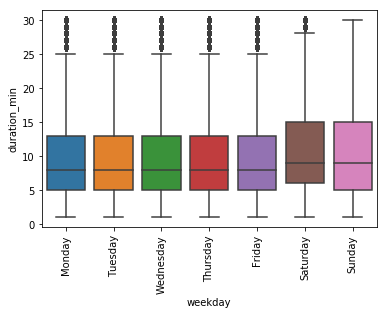

In [44]:
# new boxplot of duration compared to user type
# boxplot is used to compare categorical data with quantative data and is used to see how usage changes throughout the week
sb.boxplot(data=df30, x='weekday', y='duration_min');
plt.xticks(rotation=90);

*** Note: Starting to see a trend.  Monday to Friday duration is consistent.  The same goes for weekends.  It appears that the same people who are commuting daily to work.

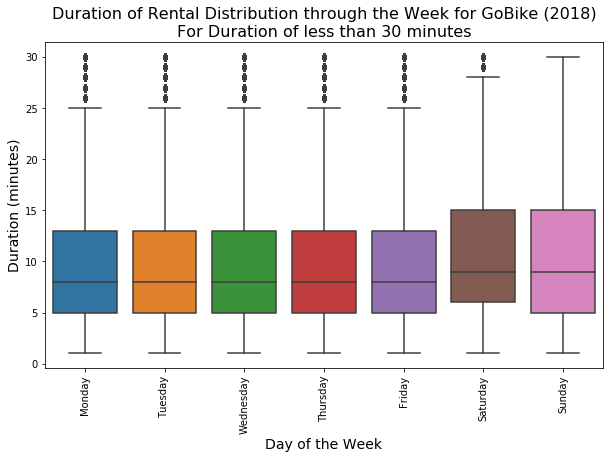

In [59]:
# POLISHING
plt.figure(figsize=(10,6))
sb.boxplot(data=df30, x='weekday', y='duration_min');
plt.xticks(rotation=90);
plt.title('Duration of Rental Distribution through the Week for GoBike (2018)\nFor Duration of less than 30 minutes', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> This dataset has only one quantitative column, which limits the need for bivariate charts, but one interesting result was the duration vs user type.  Because the data was clustered around 10 minutes, and outliers goes about to 1400 minutes, I had to focus on only 30  minutes or less to get a sense of majority of the customers.  From the result, daily users, which are subscribers, use the bike for shorter periods than the customer. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One interesting result from the weekday compared to duration is that consistency of the usage during weekdays and weekends.  The weekday usage seems to correlate with those using the bikes for work, while the weekend looks like those who use it for recreation, since they are using it for longer period of time.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question: Is there any correlation between age group and duration?

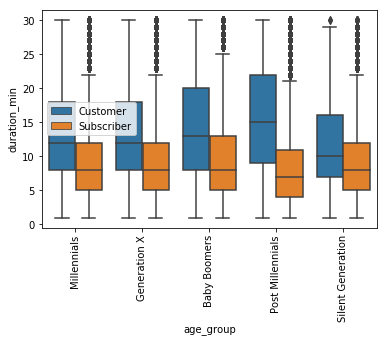

In [46]:
# for the boxplot, since we have a large amount of outlires, I will be focusing on under 30 mins.
# we will be looking at if age, user type, and duration have any correlation
df_gen_filter = df_gen.query('duration_min <= 30')
sb.boxplot(data=df_gen_filter, x='age_group', y='duration_min', hue='user_type');
plt.xticks(rotation=90);
plt.legend();

*** From the results, it looks like customers, probably tourist or others that don't use the service daily, tend to use it for longer period of time.  We also see that Post Millennials non-daily users uses the service the longest period of time.

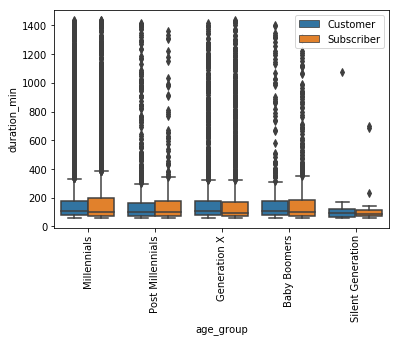

In [47]:
# I just want to see what it looks like for over an hour
# we will be looking at if age, user type, and duration have any correlation
df_gen_filter = df_gen.query('duration_min > 60')
sb.boxplot(data=df_gen_filter, x='age_group', y='duration_min', hue='user_type');
plt.xticks(rotation=90);
plt.legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Again, this dataset has only one quantitative column, which limits the need for multivariate chart.  When looking at duration compared to age group and user type, I found little difference between the different age groups.  Again, the subscribers use the bikes for shorter period of time.  

### Were there any interesting or surprising interactions between features?

> One interesting result is that the older and younger generation of the customer group tend to use the service a little longer than the Millennials and the Generation X.  Maybe the older takes longer to get to their destination and the younger might be having more fun and taking their time getting to their destination.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

# PRESENTATION
<HR>

# Bikesharing Investigation
## by Marc Nguyen
<BR><BR>

## Investigation Overview

> In this investigation, I will be exploring Ford's GoBike bike sharing program in San Francisco, California.  GoBike is a program develop by Ford to provide an alternative means of transportation for getting around town.  You can simply rent a bike to ride around town for leisure or use it as a form of commute to work.<br><br>
I will be using the dataset to paint a picture of what type of customer is using the program and how they are using it.

## Dataset Overview

> The dataset provides information on the bike trip with information on when and where the bike rental starts and stops.  It also provides information the customer with information like age, user type, and gender.

## (Visualization 1)

> The main core of the customer base for Ford's GoBike bike sharing program are male Millennials who uses the service on a daily basis.  From the analysis, 69% of bike renters are male, 60% are Millennials, and 85% pay on a scription basis.

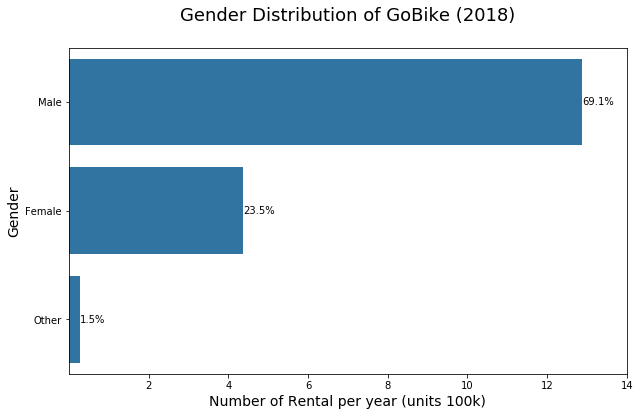

In [61]:
# POLISHING
n_gender = df.shape[0]
gender_count = df.member_gender.value_counts()
gender_count[0], gender_count[1] = gender_count[1], gender_count[0]

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='member_gender', color=base_color, order=df.member_gender.value_counts().index);
plt.title('Gender Distribution of GoBike (2018)\n', fontsize=18);
plt.xlabel('Number of Rental per year (units 100k)', fontsize=14)
plt.ylabel('Gender', fontsize=14);
ticks = [2, 4, 6, 8, 10, 12, 14]
ticks_units = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
plt.xticks(ticks_units, ticks);

for i in range(gender_count.shape[0]):
    count = gender_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)
    plt.text(count+1, i, pct_string, va='center');

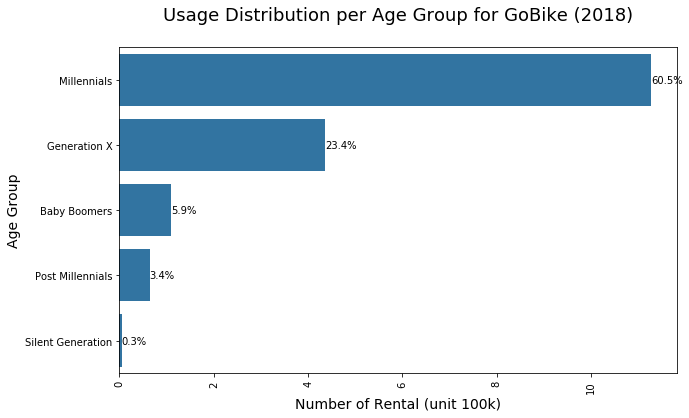

In [62]:
# POLISHING

plt.figure(figsize=(10,6))
sb.countplot(data=df_gen, y='age_group', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution per Age Group for GoBike (2018)\n', fontsize=18)
plt.ylabel('Age Group', fontsize=14)
plt.xlabel('Number of Rental (unit 100k)', fontsize=14)

xticks = np.arange(0, 11, 2)
xticks_units = xticks*100000
plt.xticks(xticks_units, xticks);

n_user = df.shape[0]
user_count = df_gen.age_group.value_counts()

for i in range(user_count.shape[0]):
    count = user_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_user)
    plt.text(count+1, i, pct_string, va='center');

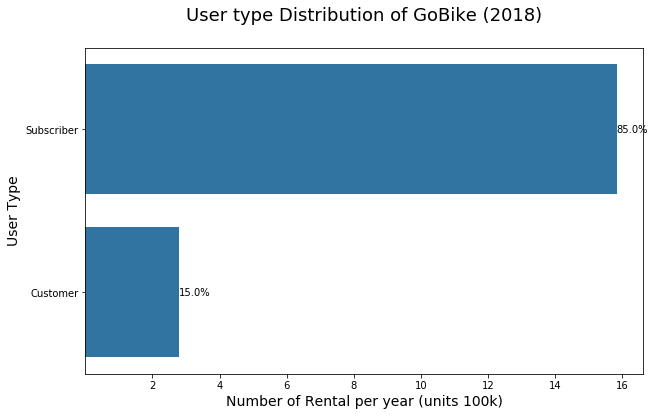

In [65]:
# POLISHING
n_user = df.shape[0]
user_count = df.user_type.value_counts()
user_count[0], user_count[1] = user_count[1], user_count[0]

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='user_type', color=base_color, order=df.user_type.value_counts().index);
plt.title('User type Distribution of GoBike (2018)\n', fontsize=18);
plt.xlabel('Number of Rental per year (units 100k)',fontsize=14)
plt.ylabel('User Type',fontsize=14);
ticks = [2, 4, 6, 8, 10, 12, 14, 16]
ticks_units = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000]
plt.xticks(ticks_units, ticks);

for i in range(user_count.shape[0]):
    count = user_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_user)
    plt.text(count+1, i, pct_string, va='center');

## (Visualization 2)

> We know who is using the service.  As for the purpose, the core of the business is for commuting to work.  We could see this by the high usage during Monday to Friday and consistent throughout the week.  We also could see this by the peak usage during peak commute hours of 7am to 9am and 4pm to 6pm.

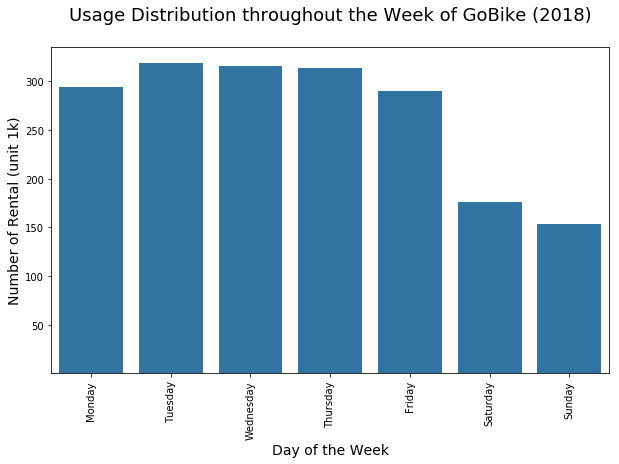

In [66]:
#POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='weekday', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the Week of GoBike (2018)\n', fontsize=18)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rental (unit 1k)', fontsize=14);
yticks = [50, 100, 150, 200, 250, 300]
yticks_units = [50000, 100000, 150000, 200000, 250000, 300000]
plt.yticks(yticks_units, yticks);

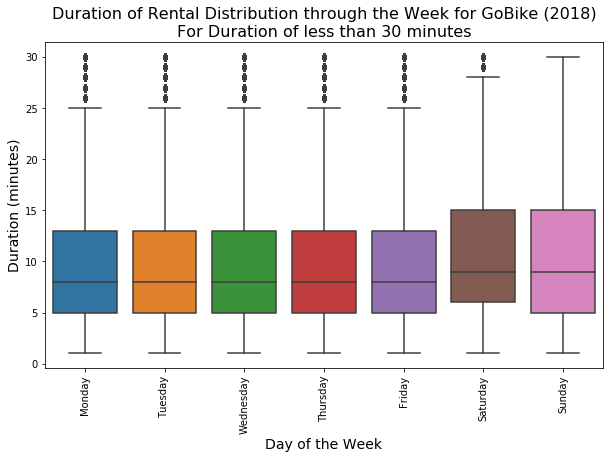

In [67]:
# POLISHING
plt.figure(figsize=(10,6))
sb.boxplot(data=df30, x='weekday', y='duration_min');
plt.xticks(rotation=90);
plt.title('Duration of Rental Distribution through the Week for GoBike (2018)\nFor Duration of less than 30 minutes', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14);

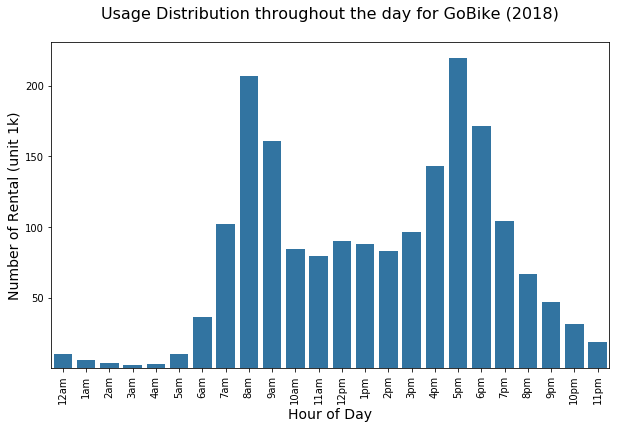

In [68]:
# POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='hour', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the day for GoBike (2018)\n', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Rental (unit 1k)', fontsize=14)
ticks = np.arange(0,24,1)
ticks_units = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xticks(ticks, ticks_units);
yticks = [50, 100, 150, 200]
yticks_units = [50000, 100000, 150000, 200000]
plt.yticks(yticks_units, yticks);

## (Visualization 3)

> In the final visualization, I found that the bike sharing service is mainly used during dry warm months of San Francisco, California, with the exception of increase in usage during Christmas shopping period.

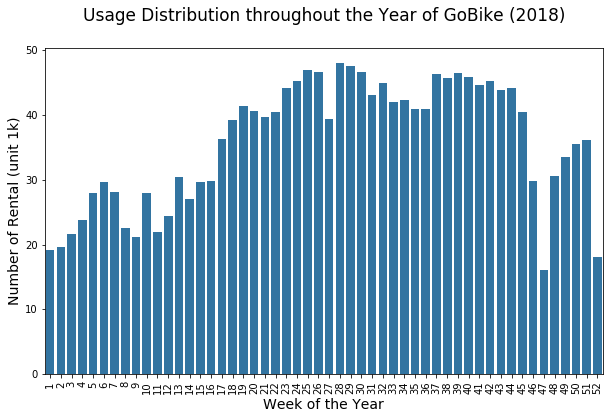

In [69]:
# POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='weekofyear', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the Year of GoBike (2018)\n', fontsize=17)
plt.xlabel('Week of the Year', fontsize=14)
plt.ylabel('Number of Rental (unit 1k)', fontsize=14)

yticks = np.arange(0, 51, 10)
yticks_units = yticks*1000
plt.yticks(yticks_units, yticks);

### END